In [1]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

In [2]:
data_train.head()

,line_id,red_count,red_mean_rev,channel_unique,channel_most_fre,display_description,battery_removable,bluetooth,device_type,fm_radio,...,cus_used_days,plan_name,carrier,de_re_channel_unique,de_re_channel_most_fre,sus_count,net_work_mean_kb,net_work_count,upgrade_date,upgrade
0,a908d0df-a352-4e54-b4f8-17ed2678beb6,1.166667,-2.769552,1.0,4.0,7.0,1.0,0.0,3.0,2.0,...,1.260325,0,0,1,4.0,-0.363636,-0.507943,-3.884822,NaN,no
1,9a9c868f-15c0-4eb7-8c5b-409c8fed2bc3,0.875000,-0.558709,3.0,1.0,6.0,2.0,2.0,2.0,2.0,...,-0.033792,2,0,2,1.0,3.363636,-0.320661,0.102232,2020-12-04,yes
2,0ea29bb1-73d6-436e-b627-31ca98d78b9c,-0.500000,-0.860188,3.0,4.0,7.0,0.0,1.0,1.0,2.0,...,-0.322904,2,0,2,4.0,0.636364,-0.328205,-1.499405,NaN,no
3,caf6c73b-a248-4bfc-8c0d-c2bf8f21b965,0.458333,0.026302,2.0,4.0,6.0,2.0,2.0,2.0,2.0,...,-0.628285,3,2,1,4.0,-0.363636,-0.311232,-0.102232,2020-04-26,yes
4,68d51abd-c2f1-49a7-bf1e-d4d8a068e104,-0.291667,0.046760,3.0,4.0,6.0,2.0,2.0,2.0,2.0,...,0.406758,2,0,2,4.0,0.272727,0.076031,0.102232,2019-08-03,yes


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   line_id                 19359 non-null  object 
 1   red_count               19359 non-null  float64
 2   red_mean_rev            19359 non-null  float64
 3   channel_unique          19359 non-null  float64
 4   channel_most_fre        19359 non-null  float64
 5   display_description     19359 non-null  float64
 6   battery_removable       19359 non-null  float64
 7   bluetooth               19359 non-null  float64
 8   device_type             19359 non-null  float64
 9   fm_radio                19359 non-null  float64
 10  has_wifi_calling        19359 non-null  float64
 11  manufacturer            19359 non-null  float64
 12  mobile_hotspot          19359 non-null  float64
 13  model                   19359 non-null  float64
 14  model_type              19359 non-null

In [16]:
list(data_train.columns[3:]) not in list(data_val.columns[1:])

True

In [17]:
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])

In [109]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

#extract the training data
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','upgrade_date','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id'],axis = 1)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression(max_iter=500)
MLP = MLPClassifier(max_iter = 500)
SVM = SVC()

clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']

#for i in range(len(names)):
#    scores  = cross_validate(clfs[i],data_X,data_y,cv = 10,scoring = scoring,return_train_score=True)
#    print(f'The model {names[i]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
#    print()


AttributeError: 'NoneType' object has no attribute 'set_params'

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()

clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']

In [4]:
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','upgrade_date','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id'],axis = 1)

In [8]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   red_count               19359 non-null  float64
 1   red_mean_rev            19359 non-null  float64
 2   channel_unique          19359 non-null  float64
 3   channel_most_fre        19359 non-null  float64
 4   display_description     19359 non-null  float64
 5   battery_removable       19359 non-null  float64
 6   bluetooth               19359 non-null  float64
 7   device_type             19359 non-null  float64
 8   fm_radio                19359 non-null  float64
 9   has_wifi_calling        19359 non-null  float64
 10  manufacturer            19359 non-null  float64
 11  mobile_hotspot          19359 non-null  float64
 12  model                   19359 non-null  float64
 13  model_type              19359 non-null  float64
 14  operating_system        19359 non-null

In [9]:
data_val_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   red_count               12744 non-null  float64
 1   red_mean_rev            12744 non-null  float64
 2   channel_unique          12744 non-null  float64
 3   channel_most_fre        12744 non-null  float64
 4   display_description     12744 non-null  float64
 5   battery_removable       12744 non-null  float64
 6   bluetooth               12744 non-null  float64
 7   device_type             12744 non-null  float64
 8   fm_radio                12744 non-null  float64
 9   has_wifi_calling        12744 non-null  float64
 10  manufacturer            12744 non-null  float64
 11  mobile_hotspot          12744 non-null  float64
 12  model                   12744 non-null  float64
 13  model_type              12744 non-null  float64
 14  operating_system        12744 non-null

In [3]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

In [10]:
data_val.iloc[:,1:]

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.343750,0.072165,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,0.046875,0.163476,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,0.164062,0.075211,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,0.125000,0.057611,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,0.265625,0.090074,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.070312,0.063918,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003007,0.003678,0.029917,0.035271,0.027462,0.022154,0.078836,0.012268,0.014641
12740,0.265625,0.052725,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012750,0.003659,0.057319,0.076913,0.005780,0.013219,0.032109,0.008480,0.007520
12741,0.343750,0.070607,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000955,0.000303,0.010649,0.008325,0.016477,0.001376,0.003090,0.001978,0.000788
12742,0.023438,0.082907,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.003373,0.000890,0.122693,0.069080,0.221589,0.034388,0.068129,0.008050,0.006131


In [4]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              12744 non-null  object 
 1   red_count                            12744 non-null  float64
 2   red_mean_rev                         12744 non-null  float64
 3   channel_unique                       12744 non-null  float64
 4   red_type_unique                      12744 non-null  float64
 5   red_type_most_fre_MPPAID             12744 non-null  float64
 6   red_type_most_fre_PAID               12744 non-null  float64
 7   red_type_most_fre_Replacement        12744 non-null  float64
 8   channel_most_fre_APP                 12744 non-null  float64
 9   channel_most_fre_HANDSET             12744 non-null  float64
 10  channel_most_fre_IVR                 12744 non-null  float64
 11  channel_most_fre_RTR        

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              19359 non-null  object 
 1   upgrade_date                         19359 non-null  object 
 2   upgrade                              19359 non-null  object 
 3   red_count                            19359 non-null  float64
 4   red_mean_rev                         19359 non-null  float64
 5   channel_unique                       19359 non-null  float64
 6   red_type_unique                      19359 non-null  float64
 7   red_type_most_fre_MPPAID             19359 non-null  float64
 8   red_type_most_fre_PAID               19359 non-null  float64
 9   red_type_most_fre_Replacement        19359 non-null  float64
 10  channel_most_fre_APP                 19359 non-null  float64
 11  channel_most_fre_HANDSET    

In [112]:
#Adaboost
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,10, 50, 100, 500],#1,2
              'learning_rate' : [0.001, 0.01, 0.1, 1.0]
             }

ABC = AdaBoostClassifier(max_features = "auto", class_weight = "auto",max_depth = None)
CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

AttributeError: 'NoneType' object has no attribute 'set_params'

In [110]:
data_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [111]:
data_y

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(reg_alpha=1, reg_lambda=0)
xgb.fit(X,Y)
Z = xgb.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([ ('clf',RandomForestClassifier(criterion='gini',class_weight = {0:0.3,1:0.7}))])

In [13]:
#RFC
from sklearn.model_selection import GridSearchCV
#param_grid = {#'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200]
#'criterion' :['gini', 'entropy']}
#'bootstrap': [True], 
#'max_depth': [5, 10, None]
#'max_features': ['auto','log2','sqrt']
#}
#n_estimators: Number of tree your random forest should have. The more n_estimators the less overfitting. You should try from 100 to 5000 range.
param_grid = { 
    'n_estimators': [100, 200, 400, 600],
    'max_features': ['auto','log2','sqrt'],
    'max_depth' : [10, 20, 30],
    'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [14]:
CV_rfc.best_score_

0.9951826039948465

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X[use_features],data_y)
CV_rfc.best_params_

## make submission

In [ ]:
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
submission_path=root_folder+"submission/2021-04-10.csv"

In [173]:
CV_rfc.best_score_

0.7654218674509696

In [172]:
CV_rfc.best_score_

0.7654218674509696

In [167]:
#Adaboost

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,2,10, 50],#1,2
              'learning_rate' : [ 0.0001,0.01, 0.1, 1.0]
             }

CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 10}

In [171]:
CV_abc.best_score_

0.6840062835872963

In [46]:
data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

In [4]:
#extract the training data
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','upgrade_date','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id'],axis = 1)

In [20]:
data_y

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [6]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   red_count                            19359 non-null  float64
 1   red_mean_rev                         19359 non-null  float64
 2   channel_unique                       19359 non-null  float64
 3   red_type_unique                      19359 non-null  float64
 4   red_type_most_fre_MPPAID             19359 non-null  float64
 5   red_type_most_fre_PAID               19359 non-null  float64
 6   red_type_most_fre_Replacement        19359 non-null  float64
 7   channel_most_fre_APP                 19359 non-null  float64
 8   channel_most_fre_HANDSET             19359 non-null  float64
 9   channel_most_fre_IVR                 19359 non-null  float64
 10  channel_most_fre_RTR                 19359 non-null  float64
 11  channel_most_fre_SMS        

In [ ]:
def select_data(data_frame):
    '''Selects certain features from raw GCR records.'''
    df_selection = data_frame.loc[:,['line_id',"carrier","plan_name",'total_kb',"upgrade"]]
    return df_selection

def get_usage_summary(df):
    '''Returns aggregate data usage for a line_id.'''
    data_kb= df.loc[:,['line_id', "total_kb"]]
    data_kb = data_kb.groupby('line_id')['total_kb'].sum().reset_index()
    data_kb.columns=['line_id','sum_total_kb']
    return data_kb

def preprocess_customer_info(df):
    '''Imputes null values in carrier and plan_name column with most frequent value.'''
    customer_info=df.loc[:,['line_id','carrier','plan_name']].drop_duplicates()
    customer_info['carrier'].fillna(customer_info['carrier'].mode()[0], inplace=True)
    customer_info['plan_name'].fillna(customer_info['plan_name'].mode()[0], inplace=True)
    customer_info=pd.get_dummies(customer_info,columns=['carrier','plan_name'],drop_first=True)
    return customer_info

def train_model(train_X,train_Y):
    '''Given a preprocessed training dataset, trains a simple logistic regression model and 
    returns the trained model object'''
    lr_recipe = LogisticRegression(fit_intercept=True,class_weight='balanced')
    lr_model = lr_recipe.fit(train_X,train_Y)
    return lr_model

def evaluate_model(model, test_X,test_Y):
    '''Given a model and preprocessed test dataset, returns the f1 value'''
    y_pred=model.predict(test_X)
    f1 =f1_score(test_Y, y_pred)
    return round(f1,3)

def main(data_path, random_seed, test_ratio=0.2):
    '''The end to end model pipeline'''
    df =pd.read_csv(data_path,low_memory=True)    
    df_selected = select_data(df)
    usage_summary=get_usage_summary(df_selected)
    customer_info=preprocess_customer_info(df_selected)
    line_ids=df_selected.loc[:,['line_id','upgrade']].drop_duplicates().reset_index(drop=True)
    df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
    df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
    df_Y=df_preprocessed['upgrade'].replace({'yes':1,'no':0})
    df_X=df_preprocessed.drop(columns=['line_id','upgrade'])
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=test_ratio, random_state=random_seed)
    num_train = len(X_train)
    num_test = len(X_test)
    print(f"Train has {num_train}")
    print(f"Test has {num_test}")
    model = train_model(X_train,Y_train)
    f1 = evaluate_model(model, X_test,Y_test)
    return model,f1

def make_predictions(model,eval_data_path,submission_path):
    '''Given a model, eval data path and submission path, makes predictions and 
    saves the submissions to submission path.'''
    eval_data = pd.read_csv(data_path,low_memory=True)    
    df_selected = select_data(eval_data)
    usage_summary=get_usage_summary(df_selected)
    customer_info=preprocess_customer_info(df_selected)
    line_ids=df_selected.loc[:,['line_id']].drop_duplicates().reset_index(drop=True)
    df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
    df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
    eval_X=df_preprocessed.drop(columns=['line_id'])
    predictions=pd.DataFrame(line_ids,columns=['line_id'])
    predictions['prediction']=model.predict(eval_X)
    predictions.to_csv(submission_path,header=True,index=None)
    print(f"submission saved to {submission_path}")

In [63]:
X_train

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=model.predict(X_test)
f1 =f1_score(test_Y, y_pred)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,train_size=0.8)
DTC = DecisionTreeClassifier().fit(X_train,y_train)
RFC = RandomForestClassifier().fit(X_train,y_train)
ABC = AdaBoostClassifier().fit(X_train,y_train)
LR = LogisticRegression(max_iter=500).fit(X_train,y_train)
MLP = MLPClassifier(max_iter = 500).fit(X_train,y_train)
SVM = SVC().fit(X_train,y_train)

In [45]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression(max_iter=500)
MLP = MLPClassifier(max_iter = 500)
SVM = SVC()

In [119]:
clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

In [92]:
from sklearn.model_selection import cross_validate

'criterion': 'gini',
'max_depth': 8,
'max_features': 'auto',
'n_estimators': 200

In [122]:
from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']
scores  = cross_validate(RandomForestClassifier(n_estimators=200),data_X,data_y,cv = 10,scoring = scoring,return_train_score=True)
print(f'The model {names[1]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')

The model RFC f1 is 0.7640254629812068, accu is 0.8694146539389669


In [121]:
RFC = RandomForestClassifier()
RFC.fit(data_X,data_y)

RandomForestClassifier()

In [125]:
data_val_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.343750,0.072165,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,0.046875,0.163476,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,0.164062,0.075211,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,0.125000,0.057611,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,0.265625,0.090074,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.070312,0.063918,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003007,0.003678,0.029917,0.035271,0.027462,0.022154,0.078836,0.012268,0.014641
12740,0.265625,0.052725,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012750,0.003659,0.057319,0.076913,0.005780,0.013219,0.032109,0.008480,0.007520
12741,0.343750,0.070607,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000955,0.000303,0.010649,0.008325,0.016477,0.001376,0.003090,0.001978,0.000788
12742,0.023438,0.082907,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.003373,0.000890,0.122693,0.069080,0.221589,0.034388,0.068129,0.008050,0.006131


In [127]:
pred = RFC.predict(data_val_X)
len(pred)

12744

In [156]:
pred = CV_rfc.predict(data_val_X)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [159]:
count = 0
for i in pred:
    if i == 1:
        count += 1
count

2732

In [146]:
count / len(pred)

0.21429692404268674

In [157]:
data_val['upgrade'] = pred

In [175]:
teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [55]:
root_folder

's3://tf-trachack-notebooks/emotional-support-vector-machine-unsw/jupyter/jovyan/'

In [158]:
submission_path=root_folder+"submission/2021-04-10.csv"
data_val[['line_id','upgrade']].to_csv(submission_path,header=True,index=None)

In [ ]:
predictions=pd.DataFrame(line_ids,columns=['line_id'])
predictions['prediction'] = model.predict(eval_X)
predictions.to_csv(submission_path,header=True,index=None)

In [ ]:
data_X

from sklearn.model_selection import cross_validate
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=100)
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()
clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']
scoring = ['f1','precision','recall','accuracy']
for i in range(len(names)):
    scores  = cross_validate(clfs[i],data_X[use_features],data_y,cv = 10,scoring = scoring,return_train_score=True)
    print(f'The model {names[i]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
    print()

In [36]:
data_X[use_features]

,network_used_day,red_count,mean_total_kb,mean_sms_in,mean_sms_out,mean_voice_min_out,mean_voice_min_in,red_mean_rev,mean_voice_count_total,cus_used_days,mean_mms_in,mean_voice_count_in,mean_mms_out,sus_count,dea_times,mean_hotspot_kb,channel_unique,plan_name_plan 2,channel_most_fre_IVR,channel_most_fre_WEB
0,0.346369,0.146179,0.000000,0.000000,0.000000,0.000865,0.003699,0.011694,0.014616,0.370125,0.000000,0.040279,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,1.0
1,1.000000,0.122924,0.004315,0.003529,0.003105,0.005149,0.002877,0.055288,0.018758,0.116507,0.007654,0.020009,0.001790,0.359649,0.695652,0.00000,0.4,1,1.0,0.0
2,0.737430,0.013289,0.004141,0.001296,0.001285,0.011887,0.016367,0.049344,0.054777,0.059848,0.010001,0.078985,0.012862,0.096491,0.043478,0.00000,0.4,1,0.0,1.0
3,0.966480,0.089701,0.004532,0.000557,0.000567,0.004643,0.008836,0.066824,0.015461,0.000000,0.001775,0.013643,0.001468,0.000000,0.000000,0.00000,0.2,0,0.0,1.0
4,1.000000,0.029900,0.013455,0.001463,0.001035,0.007379,0.009139,0.067227,0.032500,0.202845,0.006400,0.042141,0.003024,0.061404,0.065217,0.00000,0.4,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.988827,0.069767,0.004381,0.000318,0.000175,0.024530,0.026819,0.066286,0.050261,0.097376,0.060515,0.059783,0.035946,0.061404,-1.000000,0.00000,0.0,0,0.0,0.0
19355,1.000000,0.093023,0.053482,0.000343,0.000326,0.031058,0.026687,0.068169,0.075532,0.025509,0.000792,0.082766,0.000741,0.131579,0.282609,0.00000,0.2,0,1.0,0.0
19356,1.000000,0.086379,0.022613,0.001501,0.001622,0.030480,0.059980,0.066425,0.101462,0.069904,0.004553,0.159621,0.000679,0.333333,0.086957,0.00000,0.0,0,1.0,0.0
19357,0.988827,0.023256,0.009416,0.002048,0.001948,0.007267,0.009152,0.068169,0.020845,0.047093,0.008473,0.030045,0.003183,0.017544,0.043478,0.01484,0.2,0,0.0,0.0


In [40]:
from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']
RFC = RandomForestClassifier()
scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 10,scoring = scoring,return_train_score=True)
print(f'The model RFC f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
print()

The model RFC f1 is 0.7683098564454808, accu is 0.8697244378243321



In [95]:
pd.set_option("display.max_rows",60)

In [96]:
submission.set_index('line_id')

,upgrade
line_id,
a345b1ec-d999-47ed-8715-99d73797c8eb,1
2c8d27db-3ec7-4036-a70b-58098467071e,0
992479f5-2a43-481b-9f26-a3b489d336c8,1
20afe47b-2549-4019-8dfb-0c50d2514aae,0
bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...
edd1a80c-2c96-4922-8e32-f7361ee23828,0
0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
1666d58c-732d-475a-91b9-11880f9cedbe,0


In [ ]:
submission

#criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=100
The model RFC f1 is 0.7694861081461757, accu is 0.8701895274094007

In [66]:
RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=100).fit(data_X[use_features],data_y)

In [65]:
data_val_X[use_features]

,network_used_day,red_count,mean_total_kb,mean_sms_in,mean_sms_out,mean_voice_min_out,mean_voice_min_in,red_mean_rev,mean_voice_count_total,cus_used_days,mean_mms_in,mean_voice_count_in,mean_mms_out,sus_count,dea_times,mean_hotspot_kb,channel_unique,plan_name_plan 2,channel_most_fre_IVR,channel_most_fre_WEB
0,1.000000,0.343750,0.001293,0.012822,0.011754,0.018568,0.045832,0.072165,0.035513,0.104558,0.000872,0.017045,0.000237,0.216216,0.347826,0.0,0.000000,0,1.0,0.0
1,0.882682,0.046875,0.001087,0.003904,0.003428,0.004587,0.000197,0.163476,0.014588,0.000000,0.002608,0.000508,0.000168,0.099099,0.065217,0.0,0.333333,1,1.0,0.0
2,1.000000,0.164062,0.007121,0.139339,0.130237,0.006547,0.018683,0.075211,0.082680,0.161833,0.004670,0.060105,0.004449,0.315315,0.434783,0.0,0.166667,0,1.0,0.0
3,0.988827,0.125000,0.003790,0.015224,0.008857,0.017049,0.012884,0.057611,0.064468,0.177919,0.001165,0.012247,0.000120,-1.000000,-1.000000,0.0,0.166667,1,1.0,0.0
4,1.000000,0.265625,0.064312,0.017265,0.002377,0.009494,0.009324,0.090074,0.041124,0.290032,0.005199,0.014482,0.027256,0.045045,0.021739,0.0,0.166667,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.910615,0.070312,0.027462,0.029917,0.035271,0.014641,0.012268,0.063918,0.078836,0.161589,0.003007,0.022154,0.003678,0.135135,0.173913,0.0,0.166667,1,0.0,1.0
12740,0.988827,0.265625,0.005780,0.057319,0.076913,0.007520,0.008480,0.052725,0.032109,0.150865,0.012750,0.013219,0.003659,0.045045,0.021739,0.0,0.333333,1,0.0,1.0
12741,0.977654,0.343750,0.016477,0.010649,0.008325,0.000788,0.001978,0.070607,0.003090,0.009018,0.000955,0.001376,0.000303,0.036036,0.086957,0.0,0.166667,0,0.0,1.0
12742,0.597765,0.023438,0.221589,0.122693,0.069080,0.006131,0.008050,0.082907,0.068129,0.053132,0.003373,0.034388,0.000890,0.009009,0.021739,0.0,0.166667,0,1.0,0.0


In [67]:
pred = RFC.predict(data_val_X[use_features])

In [68]:
submission = pd.DataFrame(data_val['line_id'])

In [70]:
submission['upgrade'] = pred

In [71]:
submission

,line_id,upgrade
0,a345b1ec-d999-47ed-8715-99d73797c8eb,1
1,2c8d27db-3ec7-4036-a70b-58098467071e,0
2,992479f5-2a43-481b-9f26-a3b489d336c8,1
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...,...
12739,edd1a80c-2c96-4922-8e32-f7361ee23828,0
12740,0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
12741,1666d58c-732d-475a-91b9-11880f9cedbe,0
12742,b9ab9462-20ef-46d6-b921-69fa90033750,0


In [72]:
root_folder

's3://tf-trachack-notebooks/emotional-support-vector-machine-unsw/jupyter/jovyan/'

In [97]:
sub1 = pd.read_csv(root_folder+"submission/2021-04-10.csv")

In [99]:
count = 0
for i in sub1['upgrade']:
    if i == 1:
        count+=1
count

2732

In [100]:
sub2 = pd.read_csv(root_folder+"submission/2021-04-11.csv")
count = 0
for i in sub2['upgrade']:
    if i == 1:
        count+=1
count

2775

In [85]:
submission_path=root_folder+"submission/2021-04-11.csv"
submission.to_csv(submission_path,header=True,index=None)

PermissionError: Anonymous access is forbidden for this operation

In [54]:
count = 0
for i in submission['upgrade']:
    if i == 1:
        count += 1
count

2766

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X[use_features],data_y)
CV_rfc.best_params_

In [110]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=5)

In [102]:
pred = CV_rfc.predict(data_val_X[use_features])
pred

array([1, 0, 1, ..., 0, 0, 0])

In [111]:
count = 0
for i in pred:
    if i == 1:
        count +=1
count

2775

In [92]:
submission['upgrade'] = pred

In [81]:
submission

,line_id,upgrade
0,a345b1ec-d999-47ed-8715-99d73797c8eb,1
1,2c8d27db-3ec7-4036-a70b-58098467071e,0
2,992479f5-2a43-481b-9f26-a3b489d336c8,1
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...,...
12739,edd1a80c-2c96-4922-8e32-f7361ee23828,0
12740,0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
12741,1666d58c-732d-475a-91b9-11880f9cedbe,0
12742,b9ab9462-20ef-46d6-b921-69fa90033750,0


In [ ]:
{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

best1:'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100
 
best2: {'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [152]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [14]:
data_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [21]:
data_train['upgrade'] = data_y

In [23]:
data_train = data_train.drop(['line_id','upgrade_date'],axis=1)

In [25]:
data_train.describe()

,upgrade,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
count,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,...,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000
mean,0.338551,0.063223,0.071565,0.207516,0.022670,0.995764,0.000568,0.001550,0.132755,0.004339,...,0.005591,0.016104,0.013430,0.002495,0.002160,0.025205,0.060767,0.054458,0.025998,0.026583
std,0.473229,0.049933,0.070442,0.192379,0.088697,0.064946,0.023831,0.039336,0.339318,0.065730,...,0.028260,0.043138,0.042816,0.008113,0.008160,0.039249,0.069335,0.061167,0.041560,0.038422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.019934,0.051854,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001137,0.000377,0.000471,0.000223,0.003272,0.018035,0.017091,0.004875,0.005755
50%,0.000000,0.053156,0.066286,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004641,0.002530,0.001290,0.000900,0.011703,0.040777,0.037014,0.013561,0.015174
75%,1.000000,0.100689,0.072352,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014614,0.010233,0.002857,0.002382,0.030661,0.078191,0.068976,0.030615,0.032346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100

In [15]:
RFC = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=100).fit(data_X,data_y)

In [26]:
data_X.columns

Index(['red_count', 'red_mean_rev', 'channel_unique', 'red_type_unique',
       'red_type_most_fre_MPPAID', 'red_type_most_fre_PAID',
       'red_type_most_fre_Replacement', 'channel_most_fre_APP',
       'channel_most_fre_HANDSET', 'channel_most_fre_IVR',
       'channel_most_fre_RTR', 'channel_most_fre_SMS', 'channel_most_fre_TAS',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL', 'display_description_is_miss',
       'cus_used_days', 'carr

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
#param_grid = {#'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200]
#'criterion' :['gini', 'entropy']}
#'bootstrap': [True], 
#'max_depth': [5, 10, None]
#'max_features': ['auto','log2','sqrt']
#}
#n_estimators: Number of tree your random forest should have. The more n_estimators the less overfitting. You should try from 100 to 5000 range.
param_grid = { 
    'n_estimators': [100, 200,],
    'max_features': ['auto','log2','sqrt'],
    'max_depth' : [10, 20,None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

In [27]:
CV_rfc.best_score_

0.9951826039948465

In [41]:
feat_names[indices][:1]

Index(['operating_system'], dtype='object')

In [72]:
f1_dict = {}
for i in range(1,len(feat_names)+1):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=100).fit(data_X[use_features],data_y)
    y_pred = RFC.predict(data_X[use_features])
    f1 = f1_score(data_y,y_pred)
    f1_dict[i] = f1
#import matplotlib.pyplot as plt
#plt.plot(f1_dict.keys(),f1_dict.values())
#plt.show()

In [73]:
use_features = feat_names[indices][:19]

In [62]:
RFC = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=100).fit(data_X[use_features],data_y)

In [63]:
y_pred = RFC.predict(data_X[use_features])
f1_score(data_y,y_pred)

0.9967122868720849

In [65]:
y_val_pred = RFC.predict(data_val_X[use_features])
y_val_pred

array([1, 0, 1, ..., 0, 0, 1])

In [68]:
submission = pd.DataFrame(data_val['line_id'])
submission['upgrade'] = y_val_pred

In [71]:
submission_path=root_folder+"submission/2021-04-15.csv"
submission.to_csv(submission_path,header=True,index=None)

In [24]:
RFC.oob_score

False

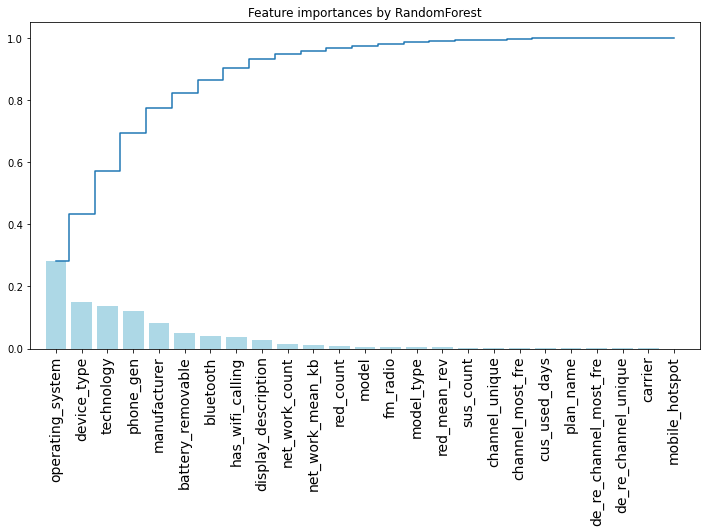

In [16]:
import matplotlib.pyplot as plt
importances = RFC.feature_importances_
feat_names = data_X.columns
# 排序
indices = np.argsort(importances)[::-1]
# 绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [17]:
importances

array([8.90017635e-03, 3.68587874e-03, 2.10131696e-03, 1.85589972e-03,
       2.88664305e-02, 4.91076545e-02, 3.98191080e-02, 1.50875952e-01,
       6.11033579e-03, 3.85049896e-02, 8.07364000e-02, 4.80395745e-05,
       6.51749281e-03, 5.96891291e-03, 2.82878163e-01, 1.22478540e-01,
       1.37922197e-01, 1.74770122e-03, 5.86824758e-04, 1.78563164e-04,
       2.32668022e-04, 5.76909200e-04, 3.37280250e-03, 1.13668113e-02,
       1.55602339e-02])

In [34]:
use_features = feat_names[indices][:18]
use_features

Index(['operating_system', 'device_type', 'technology', 'phone_gen',
       'manufacturer', 'battery_removable', 'bluetooth', 'has_wifi_calling',
       'display_description', 'net_work_count', 'net_work_mean_kb',
       'red_count', 'model', 'fm_radio', 'model_type', 'red_mean_rev',
       'sus_count', 'channel_unique'],
      dtype='object')

In [153]:
#store the model
from joblib import dump, load
dump(CV_rfc, 'CV_rfc_1.joblib')

['CV_rfc_1.joblib']

In [164]:
#Adaboost
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 50, 100, 500],
              'learning_rate' : [ 0.01, 0.1, 1.0]
             }
ABC = AdaBoostClassifier()
CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

AttributeError: 'NoneType' object has no attribute 'set_params'

In [ ]:
num = 
corr_df=train[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

In [ ]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
#DT
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,None]
}

grid=GridSearchCV(classifier, param_grid=param_dist, cv=10, n_jobs=-1)

In [98]:
scores

{'fit_time': array([0.35578537, 0.36464357, 0.35024738, 0.36124158, 0.40056062,
        0.36154866, 0.38162875, 0.36229515, 0.36409283, 0.47397733]),
 'score_time': array([0.00865555, 0.00872803, 0.00849414, 0.00944614, 0.00974679,
        0.00897741, 0.00831795, 0.00841761, 0.00955963, 0.01258183]),
 'test_f1': array([0.69802731, 0.70685757, 0.71700992, 0.71310861, 0.71290082,
        0.73318216, 0.71829916, 0.71659325, 0.71588367, 0.70518519]),
 'train_f1': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.69381599, 0.69791667, 0.71646341, 0.7       , 0.696793  ,
        0.72713643, 0.71558245, 0.69121813, 0.70072993, 0.68489209]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.70229008, 0.71603053, 0.71755725, 0.72671756, 0.72977099,
        0.73932927, 0.72103659, 0.74390244, 0.73170732, 0.72671756]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_accuracy': array([0.79442149, 0.7990

In [76]:
def get_score(model):
    y_pred=model.predict(X_test)
    f1 =f1_score(y_test, y_pred)
    accu = accuracy_score(y_test,y_pred)
    return f1,accu

In [78]:
data_folder='s3://tf-trachack-data/212/'
data_path = data_folder+"data/" + 'dev' + '/'
upgrades=pd.read_csv(data_path + "upgrades.csv")

In [84]:
#base accuracy
q = len(data_y[data_y == 0]) / len(data_y)
q

0.6614494550338343

In [91]:
#base f1 score
# 2q/(q+1)
f1 = 2q/(q+1)
f1

0.5058464863196079

In [89]:
data_y.values

array([0, 1, 0, ..., 1, 0, 1])

In [77]:
#
for i in range(len(names)):
    f1,accu = get_score(clfs[i])
    print(f'The model {names[i]} f1 is {f1}, accu is {accu}')
    print()

The model DTC f1 is 0.7190839694656488, accu is 0.8099173553719008

The model RFC f1 is 0.7558685446009389, accu is 0.8657024793388429

The model ABC f1 is 0.7545076282940361, accu is 0.8628615702479339

The model LR f1 is 0.06073752711496746, accu is 0.6645144628099173

The model MLP f1 is 0.3022508038585209, accu is 0.6637396694214877

The model SVM f1 is 0.019593067068575734, accu is 0.6639979338842975



In [ ]:
pred_train = DTC.predict(X_train)
pred_test = DTC.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':list(range(2,96))}
DTC = DecisionTreeClassifier()
clf = GridSearchCV(DTC,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
print(f'The train accuracy is {accuracy_score(y_train,pred_train)}')
print(f'The test accuracy is {accuracy_score(y_test,pred_test)}')


In [62]:
X_train.describe()

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
count,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,...,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000
mean,0.063223,0.071565,0.207516,0.022670,0.995764,0.000568,0.001550,0.132755,0.004339,0.412160,...,0.005591,0.016104,0.013430,0.002495,0.002160,0.025205,0.060767,0.054458,0.025998,0.026583
std,0.049933,0.070442,0.192379,0.088697,0.064946,0.023831,0.039336,0.339318,0.065730,0.492236,...,0.028260,0.043138,0.042816,0.008113,0.008160,0.039249,0.069335,0.061167,0.041560,0.038422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019934,0.051854,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001137,0.000377,0.000471,0.000223,0.003272,0.018035,0.017091,0.004875,0.005755
50%,0.053156,0.066286,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004641,0.002530,0.001290,0.000900,0.011703,0.040777,0.037014,0.013561,0.015174
75%,0.100689,0.072352,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.014614,0.010233,0.002857,0.002382,0.030661,0.078191,0.068976,0.030615,0.032346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_val.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [56]:
Y_train.replace({'no':0,'yes':1})

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [ ]:
df.replace({0: 10, 1: 100})

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   red_count                            19359 non-null  float64
 1   red_mean_rev                         19359 non-null  float64
 2   channel_unique                       19359 non-null  float64
 3   red_type_unique                      19359 non-null  float64
 4   red_type_most_fre_MPPAID             19359 non-null  float64
 5   red_type_most_fre_PAID               19359 non-null  float64
 6   red_type_most_fre_Replacement        19359 non-null  float64
 7   channel_most_fre_APP                 19359 non-null  float64
 8   channel_most_fre_HANDSET             19359 non-null  float64
 9   channel_most_fre_IVR                 19359 non-null  float64
 10  channel_most_fre_RTR                 19359 non-null  float64
 11  channel_most_fre_SMS        

In [55]:
Y_train

0         no
1        yes
2         no
3        yes
4        yes
        ... 
19354     no
19355    yes
19356    yes
19357     no
19358    yes
Name: upgrade, Length: 19359, dtype: object

In [51]:
data_val.columns

Index(['line_id', 'red_count', 'red_mean_rev', 'channel_unique',
       'red_type_unique', 'red_type_most_fre_MPPAID', 'red_type_most_fre_PAID',
       'red_type_most_fre_Replacement', 'channel_most_fre_APP',
       'channel_most_fre_HANDSET', 'channel_most_fre_IVR',
       'channel_most_fre_RTR', 'channel_most_fre_SMS', 'channel_most_fre_TAS',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL', 'display_description_is_miss',
       'cus_used_d

In [49]:
len(data_train.columns[3:])

62

In [44]:
len(data_val.columns[1:])

62

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              19359 non-null  object 
 1   upgrade_date                         19359 non-null  object 
 2   upgrade                              19359 non-null  object 
 3   red_count                            19359 non-null  float64
 4   red_mean_rev                         19359 non-null  float64
 5   channel_unique                       19359 non-null  float64
 6   red_type_unique                      19359 non-null  float64
 7   red_type_most_fre_MPPAID             19359 non-null  float64
 8   red_type_most_fre_PAID               19359 non-null  float64
 9   red_type_most_fre_Replacement        19359 non-null  float64
 10  channel_most_fre_APP                 19359 non-null  float64
 11  channel_most_fre_HANDSET    

In [13]:
data_val.columns[1:]

Index(['red_count', 'red_mean_rev', 'channel_unique', 'red_type_unique',
       'red_type_most_fre_LL BILL', 'red_type_most_fre_MPPAID',
       'red_type_most_fre_PAID', 'red_type_most_fre_Replacement',
       'channel_most_fre_APP', 'channel_most_fre_HANDSET',
       'channel_most_fre_IVR', 'channel_most_fre_RTR', 'channel_most_fre_SMS',
       'channel_most_fre_TAS', 'channel_most_fre_VMBC',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL',

In [ ]:
Y_train = data_train

In [4]:
data_val.head()

,line_id,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_LL BILL,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,a345b1ec-d999-47ed-8715-99d73797c8eb,0.343750,0.072165,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,2c8d27db-3ec7-4036-a70b-58098467071e,0.046875,0.163476,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,992479f5-2a43-481b-9f26-a3b489d336c8,0.164062,0.075211,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0.125000,0.057611,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,0.265625,0.090074,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494


In [6]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              12744 non-null  object 
 1   red_count                            12744 non-null  float64
 2   red_mean_rev                         12744 non-null  float64
 3   channel_unique                       12744 non-null  float64
 4   red_type_unique                      12744 non-null  float64
 5   red_type_most_fre_LL BILL            12744 non-null  float64
 6   red_type_most_fre_MPPAID             12744 non-null  float64
 7   red_type_most_fre_PAID               12744 non-null  float64
 8   red_type_most_fre_Replacement        12744 non-null  float64
 9   channel_most_fre_APP                 12744 non-null  float64
 10  channel_most_fre_HANDSET             12744 non-null  float64
 11  channel_most_fre_IVR        